# Time Series: Linear Regression

We are using regression model to predict future sales by considering time as a Independent Variable

* Linear Regression fits linear line.
* Regression line just capture the trend of the data.
* It did not capture the seasonality effect in the data.
* For forecasting the data w.r.t time, margin of error is high.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/sales_data.csv')

df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Years    72 non-null object
Sales    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


### Data Preprocessing

In [4]:
df['Years'] = pd.to_datetime(df['Years'])

df.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

In [5]:
df['time'] = np.arange(1, len(df)+1, 1)

df.head()

,Years,Sales,time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [6]:
df['month_name'] = df['Years'].dt.month_name()

df.head()

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [7]:
# Split the data into train(4 years) and test set(2 years)
size = 4*12
df_train = df.iloc[:size]
df_test = df.iloc[size:]

print(df_train.tail())
print('\n')
print(df_test.head())

        Years  Sales  time month_name
43 2004-08-01  431.8    44     August
44 2004-09-01  330.2    45  September
45 2004-10-01  330.2    46    October
46 2004-11-01  304.8    47   November
47 2004-12-01  292.1    48   December


        Years  Sales  time month_name
48 2005-01-01  266.7    49    January
49 2005-02-01  317.5    50   February
50 2005-03-01  368.3    51      March
51 2005-04-01  431.8    52      April
52 2005-05-01  457.2    53        May


In [8]:
# Split the data into independent and dependent
x_train = df_train[['time']].values
x_train.shape

(48, 1)

In [9]:
y_train = df_train['Sales'].values
y_train.shape

(48,)

In [10]:
# Split the data into independent and dependent
x_test = df_test[['time']].values
y_test = df_test['Sales'].values


### Linear Regression with Time

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model_trend = LinearRegression()
model_trend.fit(x_train, y_train)

LinearRegression()

In [13]:
y_fitted_vals = model_trend.predict(x_train)

In [14]:
y_forecast = model_trend.predict(x_test)

**confidence interval - 95% = 1.96**

CI = $\mu +- ME $

- ME = z * SE
- z = 1.96 (for 95% CI)
- SE = standard deviation of the error

In [15]:
error = y_train - y_fitted_vals
se = error.std()
ME = 1.96 * se

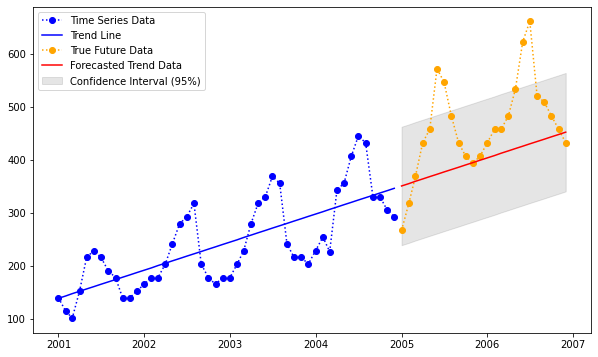

In [16]:
# visulaize the values
plt.figure(figsize=(10, 6))
plt.plot(df_train['Years'], y_train, 'bo:')
plt.plot(df_train['Years'], y_fitted_vals, 'b')


# Forecasted Data
plt.plot(df_test['Years'], y_test, 'o:', color='orange')
plt.plot(df_test['Years'], y_forecast, color='red')

# MOE
ci_plus, ci_minus = y_forecast + ME, y_forecast - ME
plt.fill_between(df_test['Years'], (ci_plus), (ci_minus), alpha=0.1, color='black')

plt.legend(['Time Series Data', 'Trend Line', 'True Future Data', 'Forecasted Trend Data', 'Confidence Interval (95%)'])
plt.show()

In [17]:
y_pred_new = model_trend.predict([[61]])

In [18]:
y_pred_new + ME, y_pred_new - ME 
print(f"Predicted value lie between {(y_pred_new - ME)[0]} and {(y_pred_new + ME)[0]}")

Predicted value lie between 291.67694148287416 and 514.8953338102217


# Time Series: Additive Model

Additive Model is a Multiple Linear Regression Model where we are adding season components to the model

<img src="data/Additive_model.jpg" width=500>

In [19]:
df_train.head()

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


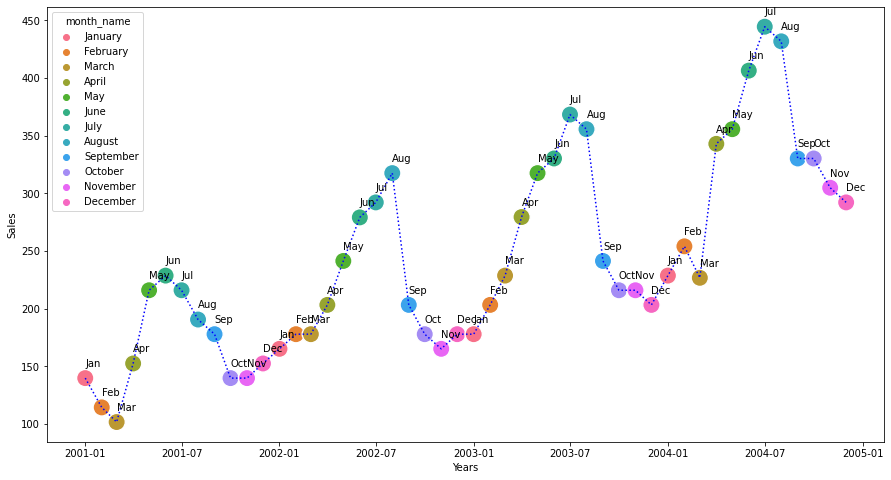

In [20]:
plt.figure(figsize=(15, 8))
# plt.scatter(df_train['Years'], df_train['Sales'], color='b')
plt.plot(df_train['Years'], df_train['Sales'], 'b:')
sns.scatterplot(x='Years', y='Sales', hue='month_name', s=300, data=df_train)

for i in range(len(df_train)):
    plt.text(df_train['Years'][i], df_train['Sales'][i] + 10, df_train['month_name'][i][:3])
plt.show()

Seasonality is 12 hence we need to create 11 columns

In [21]:
df_train_new = pd.concat((df_train, pd.get_dummies(df_train.iloc[:, 3], drop_first=True)), axis=1)
df_test_new = pd.concat((df_test, pd.get_dummies(df_test.iloc[:, 3], drop_first=True)), axis=1)

In [22]:
df_test_new.head()

,Years,Sales,time,month_name,August,December,February,January,July,June,March,May,November,October,September
48,2005-01-01,266.7,49,January,0,0,0,1,0,0,0,0,0,0,0
49,2005-02-01,317.5,50,February,0,0,1,0,0,0,0,0,0,0,0
50,2005-03-01,368.3,51,March,0,0,0,0,0,0,1,0,0,0,0
51,2005-04-01,431.8,52,April,0,0,0,0,0,0,0,0,0,0,0
52,2005-05-01,457.2,53,May,0,0,0,0,0,0,0,1,0,0,0


In [23]:
# Split the data into independent and dependent variables
cols = list(df_train_new.columns[-11:])
cols.append('time')

In [24]:
x_train_add = df_train_new[cols].values
x_test_add = df_test_new[cols].values
y_train_add = df_train_new['Sales'].values
y_test_add = df_test_new['Sales'].values

x_train_add.shape, x_test_add.shape, y_train_add.shape, y_test_add.shape

((48, 12), (24, 12), (48,), (24,))

### Train Additive Model

In [25]:
add_model = LinearRegression()
add_model.fit(x_train_add, y_train_add)

LinearRegression()

In [26]:
y_train_pred = add_model.predict(x_train_add)
y_test_pred = add_model.predict(x_test_add)

In [27]:
error = y_train_add - y_train_pred
SE = error.std()
ME = 1.96 * SE

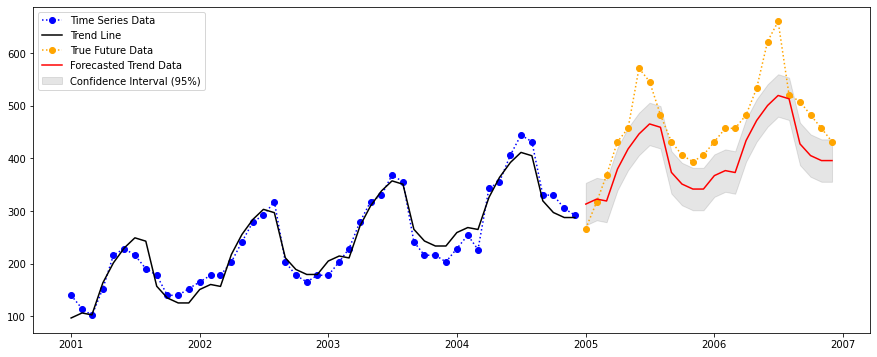

In [28]:
# visulaize the values
plt.figure(figsize=(15, 6))
plt.plot(df_train_new['Years'], y_train_add, 'bo:')
plt.plot(df_train_new['Years'], y_train_pred, color='black')

# Forecasted Data
plt.plot(df_test_new['Years'], y_test_add, 'o:', color='orange')
plt.plot(df_test_new['Years'], y_test_pred, color='red')

# MOE
ci_plus, ci_minus = y_test_pred + ME, y_test_pred - ME
plt.fill_between(df_test_new['Years'], (ci_plus), (ci_minus), alpha=0.1, color='black')

plt.legend(['Time Series Data', 'Trend Line', 'True Future Data', 'Forecasted Trend Data', 'Confidence Interval (95%)'])
plt.show()

# Multiplicative Model for Forecasting

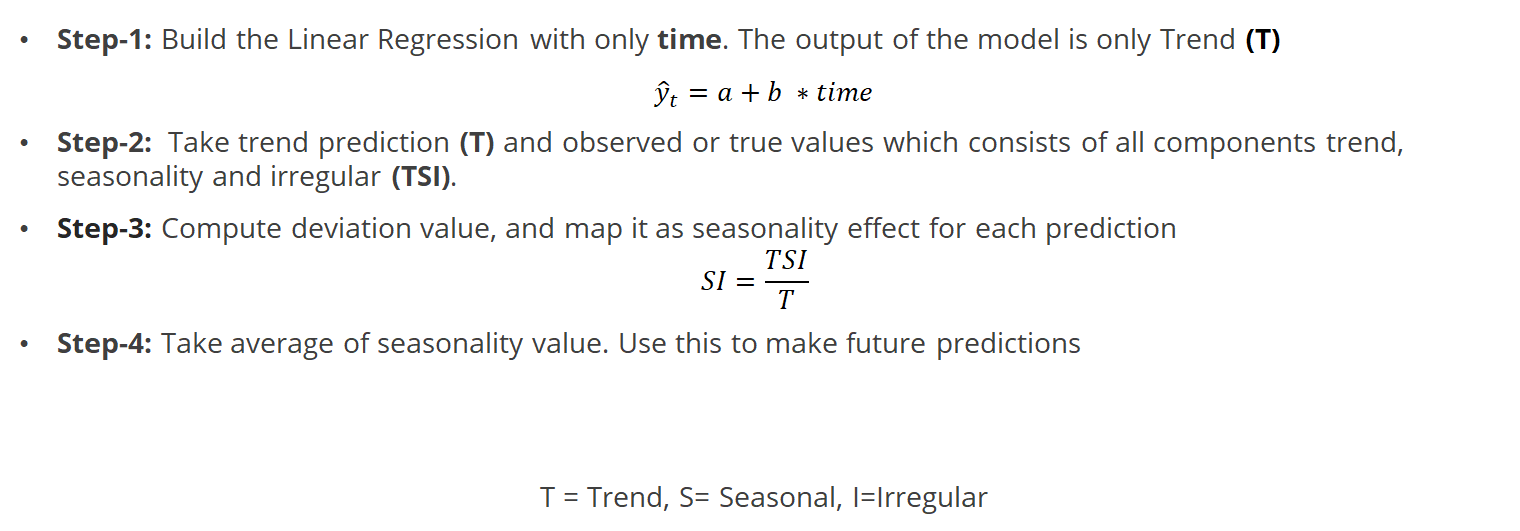

In [29]:
df_train.head()  # 4 years of data

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [30]:
df_test.head() # 2 years of data

,Years,Sales,time,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


**Step 1** Linear Regression with Time and Sales

In [31]:
df_train_new_mul = df_train.copy()
df_test_new_mul = df_test.copy()

In [32]:
x_train_mul = df_train_new_mul[['time']].values
y_train_mul = df_train_new_mul['Sales'].values

x_train_mul.shape, y_train_mul.shape

((48, 1), (48,))

In [33]:
x_test_mul = df_test_new_mul[['time']].values
y_test_mul = df_test_new_mul['Sales'].values

x_test_mul.shape, y_test_mul.shape

((24, 1), (24,))

In [34]:
model_mul = LinearRegression()
model_mul.fit(x_train_mul, y_train_mul)

LinearRegression()

**Step 2** Take Trend(T/predicted_trend) and TSI(Sales)

In [35]:
y_pred_trend_train = model_mul.predict(x_train_mul)
y_pred_trend_test = model_mul.predict(x_test_mul)

In [36]:
df_train_new_mul['predicted_trend'] = y_pred_trend_train

df_train_new_mul.head()

,Years,Sales,time,month_name,predicted_trend
0,2001-01-01,139.7,1,January,138.671939
1,2001-02-01,114.3,2,February,143.082175
2,2001-03-01,101.6,3,March,147.492412
3,2001-04-01,152.4,4,April,151.902649
4,2001-05-01,215.9,5,May,156.312885


**Step 3** Devaition to Seasonality 

SI = $\frac{TSI}{T}$

In [37]:
df_train_new_mul['SI'] = df_train_new_mul['Sales']/df_train_new_mul['predicted_trend']
df_train_new_mul.head()

,Years,Sales,time,month_name,predicted_trend,SI
0,2001-01-01,139.7,1,January,138.671939,1.007414
1,2001-02-01,114.3,2,February,143.082175,0.798842
2,2001-03-01,101.6,3,March,147.492412,0.688849
3,2001-04-01,152.4,4,April,151.902649,1.003274
4,2001-05-01,215.9,5,May,156.312885,1.381204


**Step 4** Average SI over Months

In [38]:
deviation_season = df_train_new_mul[['month_name', 'SI']].groupby(['month_name']).mean().rename(columns={'SI':'correction_factor'})

deviation_season

,correction_factor
month_name,
April,1.045770
August,1.289315
December,0.773112
February,0.840934
January,0.841208
July,1.344616
June,1.309853
March,0.804644
May,1.218536


**Step 5** Compute the fitted values

In [39]:
df_train_new_mul = df_train_new_mul.merge(deviation_season, on='month_name')

df_train_new_mul.head(15)

,Years,Sales,time,month_name,predicted_trend,SI,correction_factor
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934
5,2002-02-01,177.8,14,February,196.005015,0.907120,0.840934
6,2003-02-01,203.2,26,February,248.927855,0.816301,0.840934
7,2004-02-01,254.0,38,February,301.850695,0.841476,0.840934
8,2001-03-01,101.6,3,March,147.492412,0.688849,0.804644
9,2002-03-01,177.8,15,March,200.415252,0.887158,0.804644


In [40]:
df_train_new_mul['Fitted_values'] = df_train_new_mul['predicted_trend'] * df_train_new_mul['correction_factor']

df_train_new_mul.head()

,Years,Sales,time,month_name,predicted_trend,SI,correction_factor,Fitted_values
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208,116.651919
1,2002-01-01,165.1,13,January,191.594779,0.861715,0.841208,161.171026
2,2003-01-01,177.8,25,January,244.517618,0.727146,0.841208,205.690132
3,2004-01-01,228.6,37,January,297.440458,0.768557,0.841208,250.209239
4,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934,120.322726


### Forecasting

In [41]:
df_test_new_mul['Forecated_trend'] = y_pred_trend_test

df_test_new_mul.head()

,Years,Sales,time,month_name,Forecated_trend
48,2005-01-01,266.7,49,January,350.363298
49,2005-02-01,317.5,50,February,354.773535
50,2005-03-01,368.3,51,March,359.183771
51,2005-04-01,431.8,52,April,363.594008
52,2005-05-01,457.2,53,May,368.004244


In [42]:
df_test_new_mul = df_test_new_mul.merge(deviation_season, on='month_name')

df_test_new_mul.head(15)

,Years,Sales,time,month_name,Forecated_trend,correction_factor
0,2005-01-01,266.7,49,January,350.363298,0.841208
1,2006-01-01,431.8,61,January,403.286138,0.841208
2,2005-02-01,317.5,50,February,354.773535,0.840934
3,2006-02-01,457.2,62,February,407.696374,0.840934
4,2005-03-01,368.3,51,March,359.183771,0.804644
5,2006-03-01,457.2,63,March,412.106611,0.804644
6,2005-04-01,431.8,52,April,363.594008,1.045770
7,2006-04-01,482.6,64,April,416.516848,1.045770
8,2005-05-01,457.2,53,May,368.004244,1.218536
9,2006-05-01,533.4,65,May,420.927084,1.218536


In [43]:
df_test_new_mul['Forecasted_mul'] = df_test_new_mul['Forecated_trend'] * df_test_new_mul['correction_factor']

df_test_new_mul.head()

,Years,Sales,time,month_name,Forecated_trend,correction_factor,Forecasted_mul
0,2005-01-01,266.7,49,January,350.363298,0.841208,294.728346
1,2006-01-01,431.8,61,January,403.286138,0.841208,339.247452
2,2005-02-01,317.5,50,February,354.773535,0.840934,298.341276
3,2006-02-01,457.2,62,February,407.696374,0.840934,342.845914
4,2005-03-01,368.3,51,March,359.183771,0.804644,289.015154


In [44]:
error = df_train_new_mul['Sales'] - df_train_new_mul['Fitted_values']
SE = error.std()
ME = 1.96 * SE

In [49]:
df_train_new_mul.sort_values(by=['Years'], inplace=True)
df_test_new_mul.sort_values(by=['Years'], inplace=True)

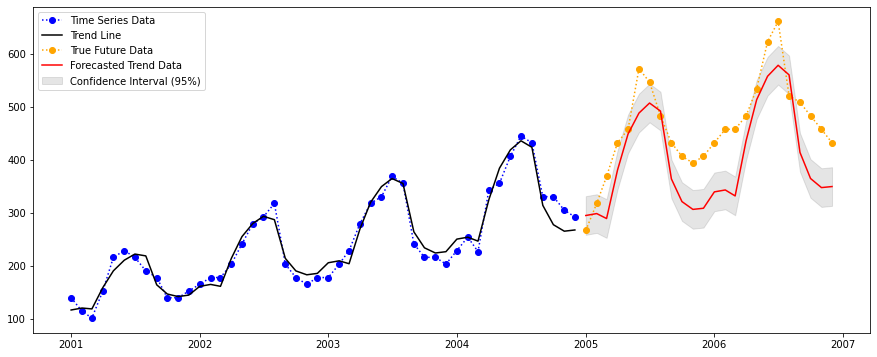

In [51]:
# visulaize the values
plt.figure(figsize=(15, 6))
plt.plot(df_train_new_mul['Years'], df_train_new_mul['Sales'], 'bo:')
plt.plot(df_train_new_mul['Years'], df_train_new_mul['Fitted_values'], color='black')

# Forecasted Data
plt.plot(df_test_new_mul['Years'], df_test_new_mul['Sales'], 'o:', color='orange')
plt.plot(df_test_new_mul['Years'], df_test_new_mul['Forecasted_mul'], color='red')

# MOE
ci_plus, ci_minus = df_test_new_mul['Forecasted_mul'] + ME, df_test_new_mul['Forecasted_mul'] - ME
plt.fill_between(df_test_new_mul['Years'], (ci_plus), (ci_minus), alpha=0.1, color='black')

plt.legend(['Time Series Data', 'Trend Line', 'True Future Data', 'Forecasted Trend Data', 'Confidence Interval (95%)'])
plt.show()